In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isna().sum().sum()

297

In [6]:
df['InternetService'] = df['InternetService'].fillna("") #This replaces all missing values (NaN) in the 'InternetService' column of the DataFrame df with an empty string ("")

In [7]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numric_col = df.select_dtypes(include=["number"])

In [12]:
numric_col.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


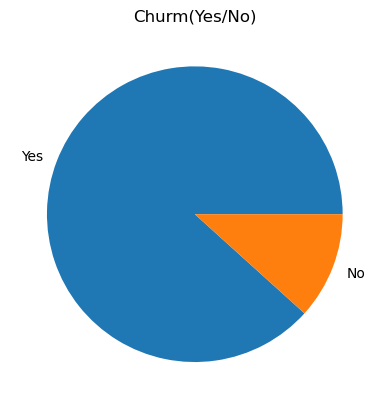

In [13]:
import matplotlib.pyplot as plt
df['Churn'].value_counts().plot(kind='pie')
plt.title('Churm(Yes/No)')
plt.ylabel("")
plt.show()

In [14]:
df.groupby("Churn")['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [15]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [17]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

## At The Lower Terams We Can See That The Monthly Charges Average Decrases

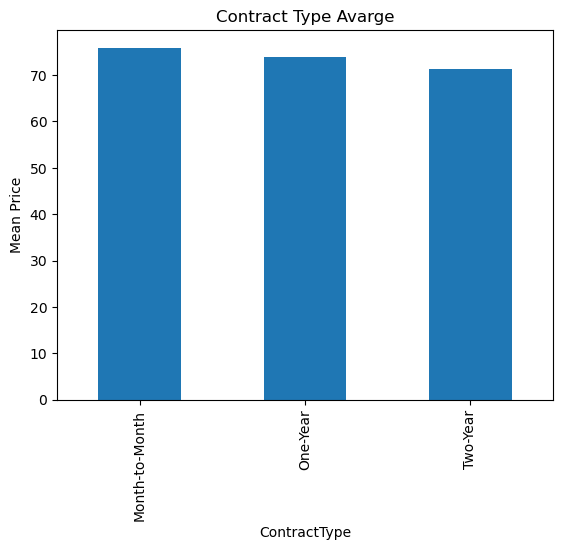

In [18]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('ContractType')
plt.title('Contract Type Avarge')
plt.show()

(array([105.,  94., 105., 108.,  93., 104., 114.,  81., 108.,  88.]),
 array([ 30.   ,  38.996,  47.992,  56.988,  65.984,  74.98 ,  83.976,
         92.972, 101.968, 110.964, 119.96 ]),
 <BarContainer object of 10 artists>)

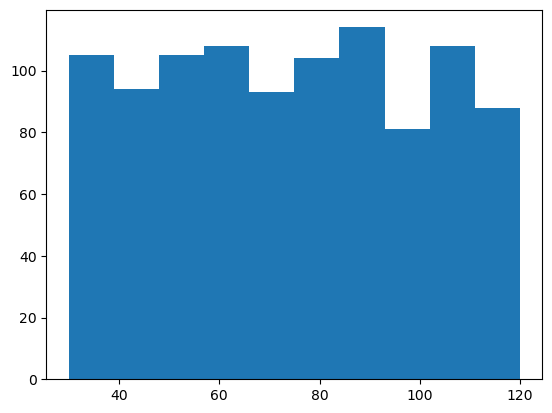

In [19]:
plt.hist(df["MonthlyCharges"])


(array([490., 233., 127.,  64.,  36.,  30.,  13.,   2.,   4.,   1.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

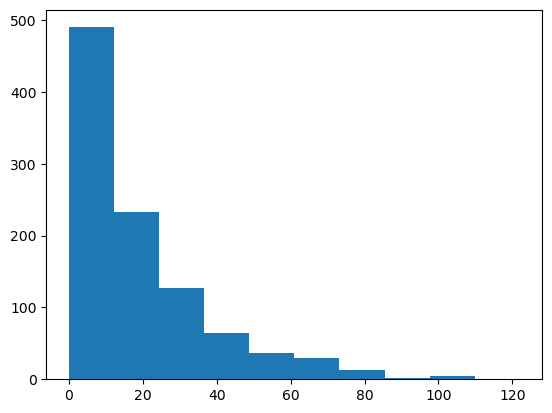

In [20]:
plt.hist(df['Tenure'])

Feature Eng.

In [21]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [22]:
X = df[['Age','Gender','Tenure','MonthlyCharges']]
y = df[['Churn']]

In [23]:
X # 1 Female 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [24]:
X['Gender']=X['Gender'].apply(lambda x:1 if x == 'Female' else 0)

/var/folders/j5/mx6jf4jj165_kcnf_hhp2cg00000gn/T/ipykernel_1399/2275132870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']=X['Gender'].apply(lambda x:1 if x == 'Female' else 0)


In [25]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [26]:
y #1 for yes 0 for no

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [27]:
y['Churn']=y['Churn'].apply(lambda x:1 if x == 'Yes' else 0)

/var/folders/j5/mx6jf4jj165_kcnf_hhp2cg00000gn/T/ipykernel_1399/3965347903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']=y['Churn'].apply(lambda x:1 if x == 'Yes' else 0)


In [28]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
import joblib

In [34]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [35]:
X_test = scaler.fit_transform(X_test)

In [36]:
from sklearn.metrics import accuracy_score
def modelperfomance(prediction):
    print('Accuacy Score of Model{}'.format(accuracy_score(y_test,prediction)))

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred_log=log_model.predict(X_test)


In [42]:
modelperfomance(y_pred_log)

Accuacy Score of Model0.88


In [43]:
from sklearn.neighbors import KNeighborsClassifier


In [44]:
param_grid = {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance']
}

In [45]:
gridknn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [46]:
gridknn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [47]:
gridknn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [48]:
y_pred_knn = gridknn.predict(X_test)

In [49]:
modelperfomance(y_pred_knn)

Accuacy Score of Model0.865


In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC()

In [57]:
param_grid={
    "C":[0.01,0.1,0.5,1],
    "kernel":["linear","rbf",'poly'],
    "gamma":['scale','auto'],
    "degree":[2,3]
 
}


In [58]:
gridsvm = GridSearchCV(SVC(),param_grid,cv=5)


In [59]:
gridsvm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [60]:
gridsvm.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [61]:
y_pred_svm = gridsvm.predict(X_test)
modelperfomance(y_pred_svm)

Accuacy Score of Model0.875


In [64]:
import os
import os
import pickle  # Make sure this is also imported

pkl_filename = "feature_logistic_regressor.pkl"

if not os.path.isfile(pkl_filename):
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(log_model, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [65]:
pkl_filename = "feature_knn.pkl"

if not os.path.isfile(pkl_filename):
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gridknn, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [66]:
pkl_filename = "feature_svm.pkl"

if not os.path.isfile(pkl_filename):
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gridsvm, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [76]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [2, 4, 6],  # one entry only
    'min_samples_split': [2, 4, 6]
}

In [77]:
grid_tree = GridSearchCV(dtree,param_grid,cv=5)

In [78]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']})

In [79]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'random'}

In [82]:
y_prid_tree=grid_tree.predict(X_test)

In [83]:
modelperfomance(y_prid_tree)

Accuacy Score of Model0.88


In [84]:
pkl_filename = "feature_DissionTree.pkl"

if not os.path.isfile(pkl_filename):
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(grid_tree, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [86]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}


In [87]:
grid_rfc = GridSearchCV(rfc,param_grid,cv=5)


In [88]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [89]:
y_pred_rfc = grid_rfc.predict(X_test)

In [90]:
modelperfomance(y_pred_rfc)

Accuacy Score of Model0.85


In [91]:
pkl_filename = "feature_RandomForest.pkl"

if not os.path.isfile(pkl_filename):
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(grid_rfc, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [92]:
grid_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [93]:
best_model = gridsvm.best_estimator_

In [94]:
joblib.dump(best_model,"churn_prediction.pkl")

['churn_prediction.pkl']